# Sklearn

## sklearn.metrics

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [2]:
from sklearn import cross_validation, datasets, linear_model, metrics 
from matplotlib.colors import ListedColormap

/Library/Python/2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация датасетов

In [4]:
clf_data, clf_target = datasets.make_classification(n_features = 2, n_informative = 2, n_classes = 2, 
                                                    n_redundant = 0, n_clusters_per_class = 1, 
                                                    random_state = 7)

In [5]:
reg_data, reg_target = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                                noise = 5., random_state = 7)

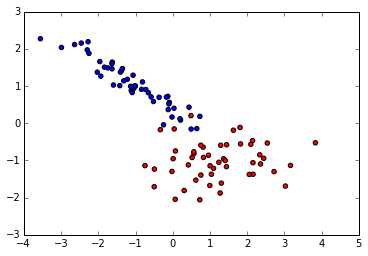

In [6]:
colors = ListedColormap(['red', 'blue'])
pylab.scatter(map(lambda x: x[0], clf_data), map(lambda x: x[1], clf_data), c = clf_target, cmap = colors)

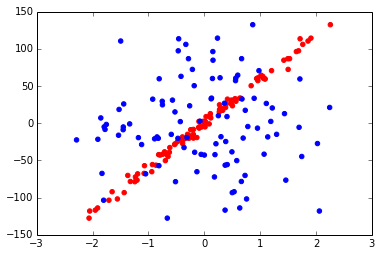

In [7]:
pylab.scatter(map(lambda x:x[1], reg_data), reg_target, color = 'r')
pylab.scatter(map(lambda x:x[0], reg_data), reg_target, color = 'b')

In [8]:
clf_train_data, clf_test_data, clf_train_labels, clf_test_labels = cross_validation.train_test_split(clf_data, clf_target,
                                                                                     test_size = 0.3, random_state = 1)

In [9]:
reg_train_data, reg_test_data, reg_train_labels, reg_test_labels = cross_validation.train_test_split(reg_data, reg_target,
                                                                                     test_size = 0.3, random_state = 1)

### Метрики качества в задачах классификации

#### Обучение модели классификации

In [10]:
classifier = linear_model.SGDClassifier(loss = 'log', random_state = 1)

In [11]:
classifier.fit(clf_train_data, clf_train_labels)

/Library/Python/2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=1, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [12]:
predictions = classifier.predict(clf_test_data)

In [17]:
probability_predictions = classifier.predict_proba(clf_test_data)

In [14]:
print clf_test_labels

[1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [15]:
print predictions

[1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [16]:
print probability_predictions

[[  0.00000000e+00   1.00000000e+00]
 [  9.99999993e-01   6.61556341e-09]
 [  9.99988143e-01   1.18567026e-05]
 [  0.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   4.62314295e-15]
 [  3.03803294e-09   9.99999997e-01]
 [  0.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   5.05766731e-13]
 [  0.00000000e+00   1.00000000e+00]
 [  9.99999999e-01   5.18878464e-10]
 [  9.99999241e-01   7.58783839e-07]
 [  2.70446065e-04   9.99729554e-01]
 [  0.00000000e+00   1.00000000e+00]
 [  4.89202012e-11   1.00000000e+00]
 [  1.00000000e+00   8.62325525e-11]
 [  9.97365075e-01   2.63492515e-03]
 [  0.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   1.30597714e-15]
 [  1.00000000e+00   3.28425090e-15]
 [  1.83630888e-13   1.00000000e+00]
 [  9.99999999e-01   5.19307103e-10]
 [  9.99999639e-01   3.60586359e-07]
 [  8.85166610e-01   1.14833390e-01]
 [  1.00000000e+00   7.21139609e-14]
 [  9.99999415e-01   5.85346707e-07]
 [  9.86697401e-01   1.33025990e-02]
 [  4.76887024e-02   9.52311298e-01]
 

#### accuracy

In [ ]:
sum([1. if pair[0] == pair[1] else 0. for pair in zip(clf_test_labels, predictions)])/len(clf_test_labels)

In [ ]:
metrics.accuracy_score(clf_test_labels, predictions)

#### confusion matrix

In [ ]:
matrix = metrics.confusion_matrix(clf_test_labels, predictions)
print matrix

In [ ]:
sum([1 if pair[0] == pair[1] else 0 for pair in zip(clf_test_labels, predictions)])

In [ ]:
matrix.diagonal().sum()

#### precision 

In [ ]:
metrics.precision_score(clf_test_labels, predictions, pos_label = 0)

In [ ]:
metrics.precision_score(clf_test_labels, predictions)

#### recall

In [ ]:
metrics.recall_score(clf_test_labels, predictions, pos_label = 0)

In [ ]:
metrics.recall_score(clf_test_labels, predictions)

#### f1

In [ ]:
metrics.f1_score(clf_test_labels, predictions, pos_label = 0)

In [ ]:
metrics.f1_score(clf_test_labels, predictions)

#### classification report

In [ ]:
print metrics.classification_report(clf_test_labels, predictions)

#### ROC curve

In [ ]:
fpr, tpr, _ = metrics.roc_curve(clf_test_labels, probability_predictions[:,1])

In [ ]:
pylab.plot(fpr, tpr, label = 'linear model')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")

#### ROC AUC

In [ ]:
metrics.roc_auc_score(clf_test_labels, predictions)

In [ ]:
metrics.roc_auc_score(clf_test_labels, probability_predictions[:,1])

#### PR AUC

In [ ]:
metrics.average_precision_score(clf_test_labels, predictions)

#### log_loss

In [ ]:
metrics.log_loss(clf_test_labels, probability_predictions[:,1])

### Метрики качества в задачах регрессии

#### Обучение регрессионной модели 

In [ ]:
regressor = linear_model.SGDRegressor(random_state = 1, n_iter = 20)

In [ ]:
regressor.fit(reg_train_data, reg_train_labels)

In [ ]:
reg_predictions = regressor.predict(reg_test_data)

In [ ]:
print reg_test_labels

In [ ]:
print reg_predictions

#### mean absolute error

In [ ]:
metrics.mean_absolute_error(reg_test_labels, reg_predictions)

#### mean squared error

In [ ]:
metrics.mean_squared_error(reg_test_labels, reg_predictions)

#### root mean squared error

In [ ]:
sqrt(metrics.mean_squared_error(reg_test_labels, reg_predictions))

#### r2 score

In [ ]:
metrics.r2_score(reg_test_labels, reg_predictions)